# MACHINE LEARNING - PREDICTING CAR PRICES AND THE KEY CAR PRICING METRICS IN THE USA MARKET                        

  # - `R.MADHAVAN `

### Importing necessary libraries needed for Data manipulation and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the csv file 

In [2]:
car_data = pd.read_csv('/Users/madhavan/Desktop/new /Machine learning 1/linear-assignment/CarPrice_Assignment.csv')

### Checking the head,shape and understanding the data

In [3]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### `We can see that there are only 205 samples .We need to be careful while splitting the dataset because if the TRAINING SET HAS MORE FEATURES THAN SAMPLES the model may overfit`

In [4]:
car_data.shape

(205, 26)

### There are many categorical variables along with continuous and discrete variables

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
len(car_data['CarName'].unique())

147

### There are 147 unique cars in the data from different companies. Lets take into consideration only the company names into consideration and drop 'CarName'

In [7]:
car_data['company_name'] = car_data['CarName'].map(lambda x:x.split()[0])

In [8]:
del car_data['CarName']

### Lets check the percentage of missing values in each column (if we need to impute missing values with mean or drop missing rows)

In [9]:
car_data.isnull().mean() * 100

car_ID              0.0
symboling           0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
company_name        0.0
dtype: float64

### The data is very clean. Lets verify once if the car_id is unique for each row and assign 'car_ID' as index

In [10]:
len(car_data['car_ID'].unique())/len(car_data.index)

1.0

In [11]:
car_data.index = car_data['car_ID'] # indexing car_id
del car_data['car_ID']

In [12]:
car_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo


### We can see that there are lot of categorical variables .So lets check the unique values to see if there are any discrepencies in the data and also check the no of unique values in each column whose datatype is 'object'

In [13]:
uniq_val_dic = {}  

for column in car_data.columns:
    if car_data[column].dtypes == 'O':
        uniq_val_dic[column] = [list(car_data[column].unique()),len(car_data[column].unique())]
    
uniq_val_dic

{'fueltype': [['gas', 'diesel'], 2],
 'aspiration': [['std', 'turbo'], 2],
 'doornumber': [['two', 'four'], 2],
 'carbody': [['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'], 5],
 'drivewheel': [['rwd', 'fwd', '4wd'], 3],
 'enginelocation': [['front', 'rear'], 2],
 'enginetype': [['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], 7],
 'cylindernumber': [['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
  7],
 'fuelsystem': [['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
  8],
 'company_name': [['alfa-romero',
   'audi',
   'bmw',
   'chevrolet',
   'dodge',
   'honda',
   'isuzu',
   'jaguar',
   'maxda',
   'mazda',
   'buick',
   'mercury',
   'mitsubishi',
   'Nissan',
   'nissan',
   'peugeot',
   'plymouth',
   'porsche',
   'porcshce',
   'renault',
   'saab',
   'subaru',
   'toyota',
   'toyouta',
   'vokswagen',
   'volkswagen',
   'vw',
   'volvo'],
  28]}

### There are two things to be noted here:
### 1) `'cylindernumber' and 'doornumber' indicates 'no of cylinders placed in a car' and 'no of doors in a car' respectively` which are ordered categorical variables that can be represented numerically (which is statistically valid).
### 2) In 'company_name' we can see that there are multiple duplicate company names with small differences in the spellings

## Lets address these

### `Lets first filter the 'doornumber' and 'carnumber'  and check it

In [14]:
car_data.filter(like = 'num')

,doornumber,cylindernumber
car_ID,,
1,two,four
2,two,four
3,two,six
4,four,four
5,four,five
...,...,...
201,four,four
202,four,four
203,four,six


### Lets convert these to integers

In [15]:
from word2number import w2n

for x in car_data.filter(like = 'num').columns:
    car_data[x] = car_data[x].map(lambda x:w2n.word_to_num(x))
    
    

In [16]:
car_data.filter(like = 'num')

,doornumber,cylindernumber
car_ID,,
1,2,4
2,2,4
3,2,6
4,4,4
5,4,5
...,...,...
201,4,4
202,4,4
203,4,6


### Lets address the issue of duplicate company names

In [17]:
uniq_val_dic['company_name']

[['alfa-romero',
  'audi',
  'bmw',
  'chevrolet',
  'dodge',
  'honda',
  'isuzu',
  'jaguar',
  'maxda',
  'mazda',
  'buick',
  'mercury',
  'mitsubishi',
  'Nissan',
  'nissan',
  'peugeot',
  'plymouth',
  'porsche',
  'porcshce',
  'renault',
  'saab',
  'subaru',
  'toyota',
  'toyouta',
  'vokswagen',
  'volkswagen',
  'vw',
  'volvo'],
 28]

### We can map and change the duplicate company names accordingly

In [18]:
## making a dictionary of the company names we have to change
change_dic = {'maxda':'mazda','Nissan':'nissan','porcshce':'porsche',
                        'toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}

def temp(x): ## creating a function to change names if keys present in dictionary or else return the names unchanged 
    if x in change_dic.keys():
        return(change_dic[x])
    else:
        return(x)

car_data['company_name'] = car_data['company_name'].map(temp)

uniq_val_dic = {}

for x in car_data.columns:
    if car_data[x].dtypes == 'O':
        uniq_val_dic[x] = [list(car_data[x].unique()),len(car_data[x].unique())]
    
uniq_val_dic

{'fueltype': [['gas', 'diesel'], 2],
 'aspiration': [['std', 'turbo'], 2],
 'carbody': [['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'], 5],
 'drivewheel': [['rwd', 'fwd', '4wd'], 3],
 'enginelocation': [['front', 'rear'], 2],
 'enginetype': [['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], 7],
 'fuelsystem': [['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
  8],
 'company_name': [['alfa-romero',
   'audi',
   'bmw',
   'chevrolet',
   'dodge',
   'honda',
   'isuzu',
   'jaguar',
   'mazda',
   'buick',
   'mercury',
   'mitsubishi',
   'nissan',
   'peugeot',
   'plymouth',
   'porsche',
   'renault',
   'saab',
   'subaru',
   'toyota',
   'volkswagen',
   'volvo'],
  22]}

### Now, as we have addressed issues and cleaned the data lets move on

## `Visualising the Data`

### Lets pick all the numerical variables and plot their distribution 

Text(0.5, 0.98, 'Distribution of numerical variables')

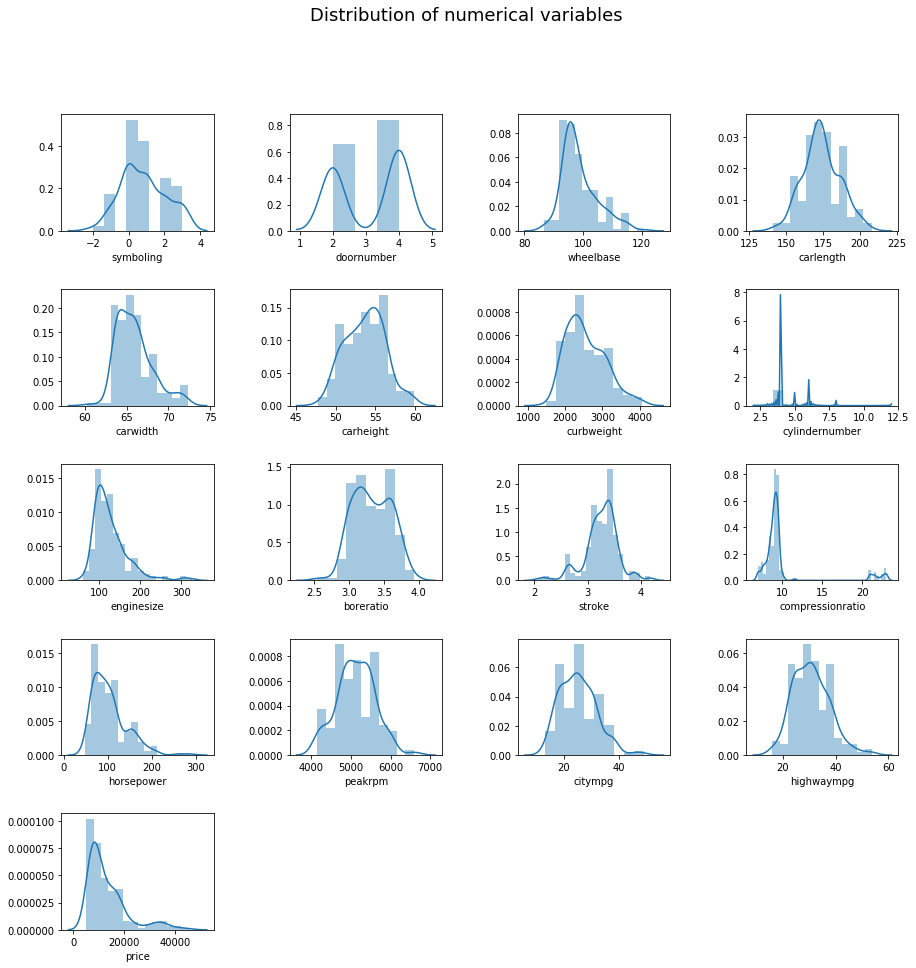

In [19]:
plt.figure(figsize = (15,15))
c = 1
for x in car_data.columns:
    if car_data[x].dtypes in [np.int , np.float]:
        plt.subplot(5,4,c)
        sns.distplot(car_data[x])
        c += 1
        
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)     
plt.suptitle('Distribution of numerical variables' ,fontsize = 18)


### 1) We can see that carwidth, engine size, horsepower along with PRICE are left skewed indicating that there may be some relationship between them
### 2) Doornumber takes the values only 2 and 4 thus it is better to convert it into dummy encoding of 0 and 1 . But lets choose to leave it untouched as it will be automatically encoded to 0 and 1 when we use min-max scaler
### 3) 'symbolling' seems to take only few unique values . So lets see how to deal with it soon

## `Lets see the co-relation of numerical variables with price and their r-squared values so that we can get an idea on what metrics we can target`

In [20]:
corr_target = car_data.corr()['price'][:-1].sort_values(ascending = False).to_frame()
corr_target.columns = ['co-relation with price']
corr_target['r_squared while other independent var are constant'] = corr_target['co-relation with price'] ** 2
corr_target = corr_target.sort_values('r_squared while other independent var are constant' , ascending = False)
corr_target

,co-relation with price,r_squared while other independent var are constant
enginesize,0.874145,0.764129
curbweight,0.835305,0.697734
horsepower,0.808139,0.653088
carwidth,0.759325,0.576575
cylindernumber,0.718305,0.515962
highwaympg,-0.697599,0.486644
citympg,-0.685751,0.470255
carlength,0.682920,0.466380
wheelbase,0.577816,0.333871
boreratio,0.553173,0.306001


### Enginesize, curbweight , horsepower are very much co-related with price. Our model should consist atleast one feature among them even though there is multi co-linearity between them

### Lets plot a regplot with confidence interval , so that we can see the relation between price and other independent numerical variables

<Figure size 720x720 with 0 Axes>

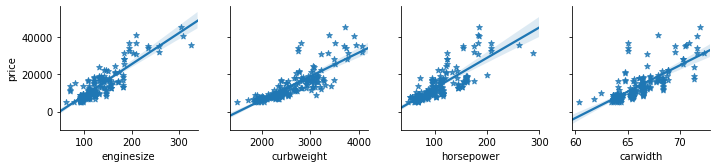

<Figure size 720x720 with 0 Axes>

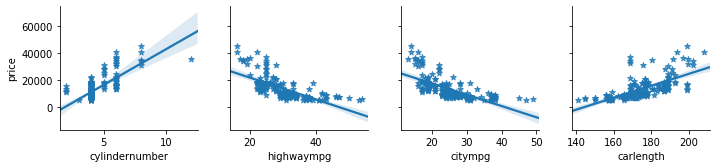

<Figure size 720x720 with 0 Axes>

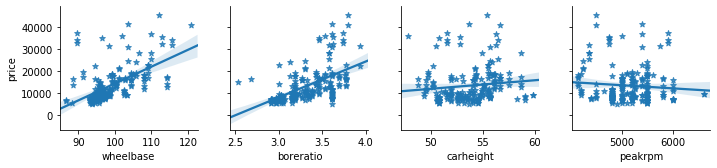

<Figure size 720x720 with 0 Axes>

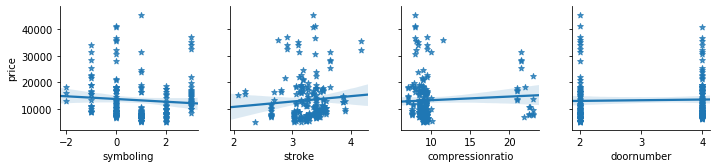

In [21]:

for part in range(1,(len(corr_target.index)//4) + 1):
    plt.figure(figsize = (10,10))
    sns.pairplot(x_vars = corr_target.index[(part-1)*4:part*4] , y_vars = 'price', data = car_data, kind = 'reg', markers = '*' )



### Lets plot the distribution of price across different categorical variables 

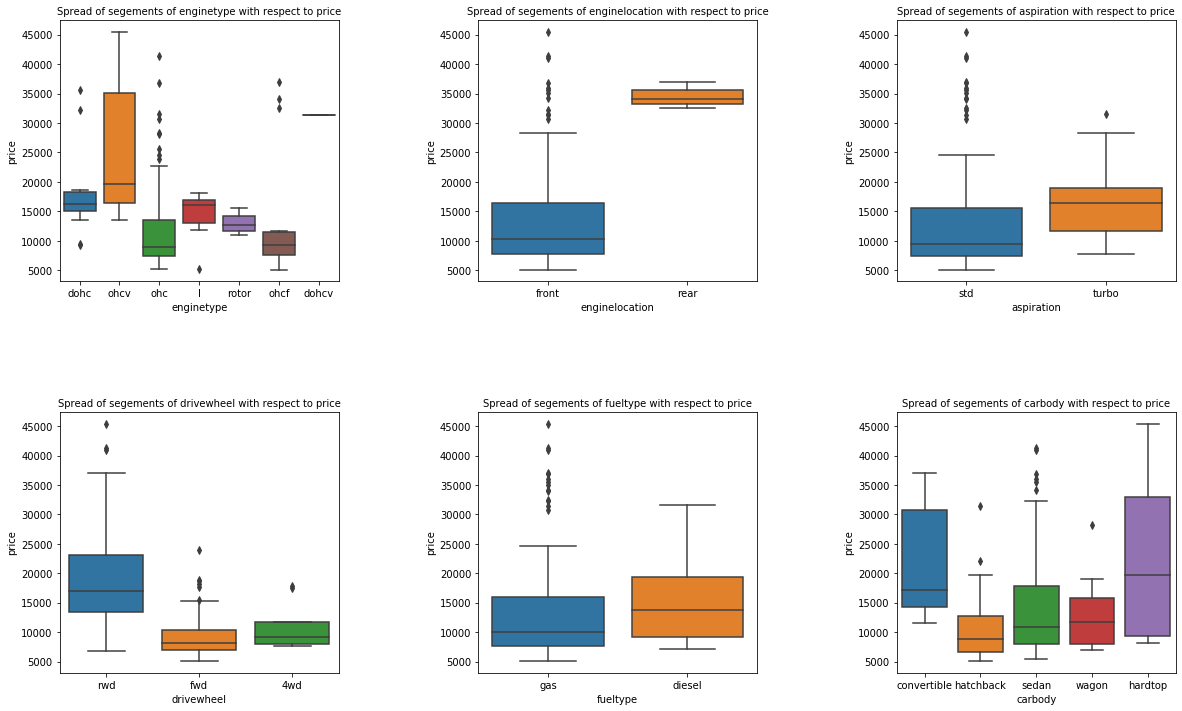

In [22]:
plt.figure(figsize = (20,12))
c = 1
for x in uniq_val_dic.keys() - ['fuelsystem','company_name']:
    plt.subplot(2,3,c)
    
    sns.boxplot(x = x , y = 'price' , data = car_data)
    plt.title('Spread of segements of '+ x + ' with respect to price' ,fontsize = 10)

    c+= 1
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)  



### There are some interesting observations with respect to 'enginelocation' , 'enginetype' and 'drivewheel' . If we can utilize this data in our model ,we will be able to explain good amount of variance of the dependent variable 'price'

### Also 'dohcv' in engine type seems to be a faulty record.Lets check it treat it

In [23]:
car_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [24]:
car_data['enginetype'] = car_data['enginetype'].replace('dohcv','ohcv') ## changing 'dohcv' to 'ohcv'

Text(0.5, 0.98, 'Spread of segments in fuel system and name of the company with respect to price')

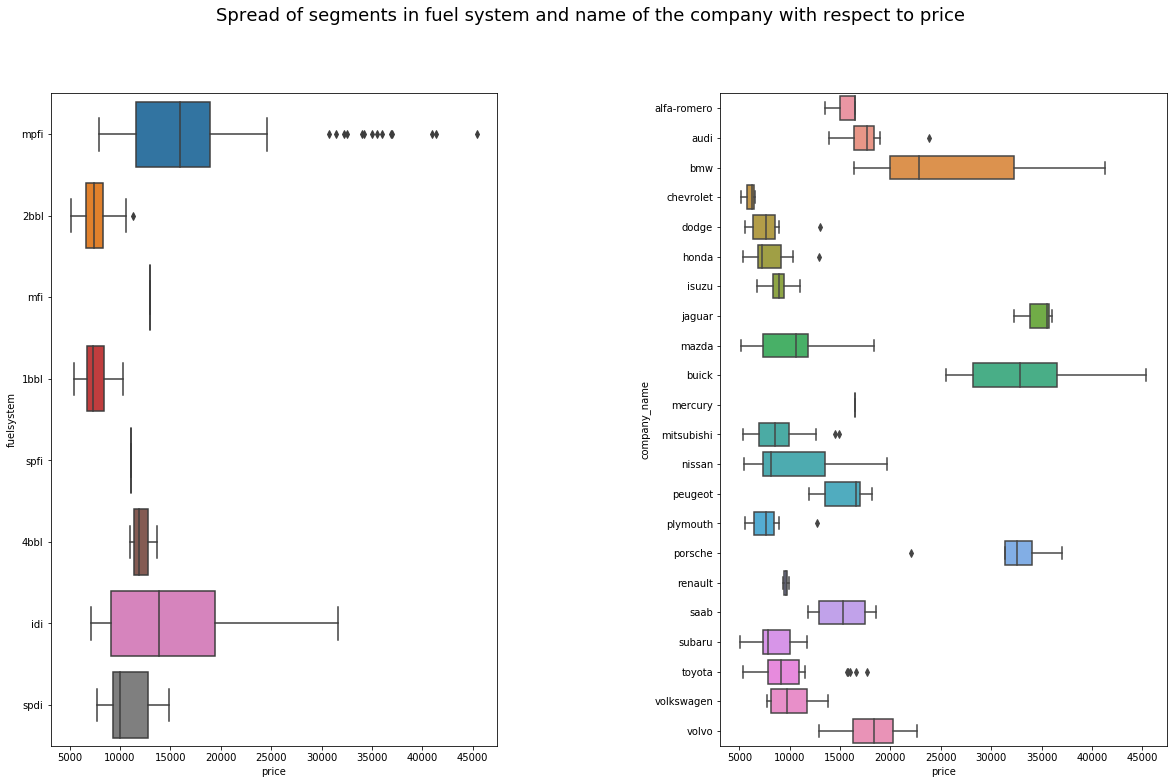

In [25]:
plt.figure(figsize = (20,12))
c = 1
for x in ['fuelsystem','company_name']:
    plt.subplot(1,2,c)
    
    sns.boxplot(x = 'price' , y = x, data = car_data)
    c+= 1
plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 

plt.suptitle('Spread of segments in fuel system and name of the company with respect to price' ,fontsize = 18)


### We can see that cars like bmw, jaguar , buick and porsche have their prices very high compared to other cars.

In [26]:
car_data.filter(like = 'mpg')

,citympg,highwaympg
car_ID,,
1,21,27
2,21,27
3,19,26
4,24,30
5,18,22
...,...,...
201,23,28
202,19,25
203,18,23


### Lets make a data driven metric 'avg mileage' by taking avg of city and highway mileage

In [27]:
car_data['avg_mileage'] = car_data.filter(like = 'mpg').mean(axis = 1)

### While visualizing we have 'symboling' takes up only few discrete unique values . Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. So lets bin it accordingly

In [28]:
car_data['symboling']

car_ID
1      3
2      3
3      1
4      2
5      2
      ..
201   -1
202   -1
203   -1
204   -1
205   -1
Name: symboling, Length: 205, dtype: int64

In [29]:
car_data['insur_risk_bin'] = pd.cut(car_data['symboling'] , bins = [-3.5,-2.5,-1.5,1.5,2.5,3.5]
       , labels = ['Safest','Safe','Moderate','Possible Risk','Risky'])
car_data[['symboling','insur_risk_bin']] 

,symboling,insur_risk_bin
car_ID,,
1,3,Risky
2,3,Risky
3,1,Moderate
4,2,Possible Risk
5,2,Possible Risk
...,...,...
201,-1,Moderate
202,-1,Moderate
203,-1,Moderate


### Lets update our categorical columns dictionary 

In [30]:
uniq_val_dic = {}

for x in car_data.columns:
    if car_data[x].dtype.name in ['object','category']:
        uniq_val_dic[x] = [list(car_data[x].unique()),len(car_data[x].unique())]
    


### We are building a linear regression model. Here , if we want to use categorical variables in our model we must convert them to (n-1) dummy variables (n = number of unique values in respective column)

In [31]:
for x in uniq_val_dic.keys():  #looping on columns which are of of datatype 'object' and 'category'
    dummy = pd.get_dummies(car_data[x], drop_first = True , prefix = x) #creating dummy variables and saving it to dummy
    
    # updating the dataframe by concatenating with created dummy variable and removing the respective categorical column
    car_data = pd.concat([car_data[car_data.columns.difference([x])],dummy], axis = 1) 

In [32]:
car_data.head()

,aspiration_turbo,avg_mileage,boreratio,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,carheight,carlength,carwidth,...,horsepower,peakrpm,price,stroke,symboling,wheelbase,insur_risk_bin_Safe,insur_risk_bin_Moderate,insur_risk_bin_Possible Risk,insur_risk_bin_Risky
car_ID,,,,,,,,,,,,,,,,,,,,,
1,0,24.0,3.47,0,0,0,0,48.8,168.8,64.1,...,111,5000,13495.0,2.68,3,88.6,0,0,0,1
2,0,24.0,3.47,0,0,0,0,48.8,168.8,64.1,...,111,5000,16500.0,2.68,3,88.6,0,0,0,1
3,0,22.5,2.68,0,1,0,0,52.4,171.2,65.5,...,154,5000,16500.0,3.47,1,94.5,0,1,0,0
4,0,27.0,3.19,0,0,1,0,54.3,176.6,66.2,...,102,5500,13950.0,3.40,2,99.8,0,0,1,0
5,0,20.0,3.19,0,0,1,0,54.3,176.6,66.4,...,115,5500,17450.0,3.40,2,99.4,0,0,1,0


In [33]:
'The final set of features available to us are {}' .format( list(car_data.columns))

"The final set of features available to us are ['aspiration_turbo', 'avg_mileage', 'boreratio', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'carheight', 'carlength', 'carwidth', 'citympg', 'company_name_audi', 'company_name_bmw', 'company_name_buick', 'company_name_chevrolet', 'company_name_dodge', 'company_name_honda', 'company_name_isuzu', 'company_name_jaguar', 'company_name_mazda', 'company_name_mercury', 'company_name_mitsubishi', 'company_name_nissan', 'company_name_peugeot', 'company_name_plymouth', 'company_name_porsche', 'company_name_renault', 'company_name_saab', 'company_name_subaru', 'company_name_toyota', 'company_name_volkswagen', 'company_name_volvo', 'compressionratio', 'curbweight', 'cylindernumber', 'doornumber', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear', 'enginesize', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsy

In [34]:
'Num of available features is {}'.format(len(car_data.columns) - 1)

'Num of available features is 63'

# Model building

### Splitting the data into train and test

In [35]:
import sklearn
from sklearn.model_selection import train_test_split

In [36]:
np.random.seed(10)
train_car , test_car = train_test_split(car_data , random_state = 10 , train_size = 0.70 , test_size = 0.30)

### Rescaling the features

In [37]:
import copy
back_car = copy.deepcopy(train_car[:])
back_car_test = copy.deepcopy(test_car[:])

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()



### We need to remember that the data is very less and we cant afford to loose data. But as the distributions of many features are skewed and there are some extreme outliers which can influence the estimators we choose to do normalization instead of standardization to bring the data in the range of 0 to 1

In [39]:
train_car[train_car.columns] = scaler.fit_transform(train_car)
train_car.head()

,aspiration_turbo,avg_mileage,boreratio,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,carheight,carlength,carwidth,...,horsepower,peakrpm,price,stroke,symboling,wheelbase,insur_risk_bin_Safe,insur_risk_bin_Moderate,insur_risk_bin_Possible Risk,insur_risk_bin_Risky
car_ID,,,,,,,,,,,,,,,,,,,,,
44,0.0,0.315068,0.550000,0.0,0.0,1.0,0.0,0.427273,0.441791,0.128205,...,0.188679,0.265306,0.041383,0.552381,0.4,0.224490,0.0,1.0,0.0,0.0
79,0.0,0.534247,0.307143,0.0,1.0,0.0,0.0,0.181818,0.241791,0.350427,...,0.125786,0.551020,0.038504,0.552381,0.8,0.206997,0.0,0.0,1.0,0.0
144,0.0,0.383562,0.771429,0.0,0.0,1.0,0.0,0.336364,0.461194,0.435897,...,0.289308,0.428571,0.120203,0.271429,0.4,0.309038,0.0,1.0,0.0,0.0
22,0.0,0.657534,0.307143,0.0,1.0,0.0,0.0,0.181818,0.241791,0.299145,...,0.125786,0.551020,0.011271,0.552381,0.6,0.206997,0.0,1.0,0.0,0.0
129,0.0,0.164384,0.857143,0.0,0.0,0.0,0.0,0.254545,0.414925,0.401709,...,1.000000,0.714286,0.792165,0.395238,1.0,0.084548,0.0,0.0,0.0,1.0


### Lets visualize and see the heatmap of co-relations of the features and dependent variable 

Text(122.09374999999999, 0.5, 'y_test_pred')

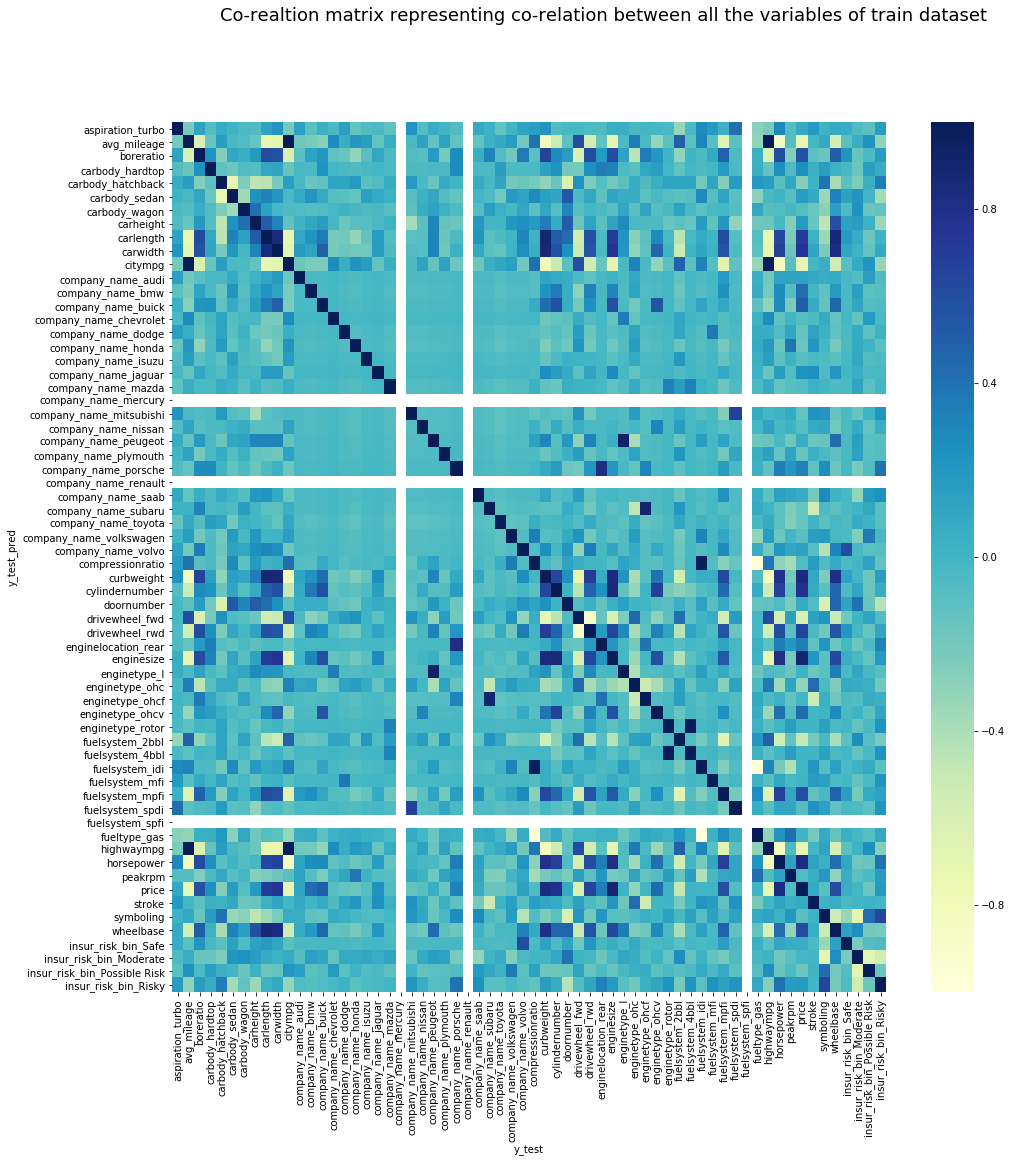

In [40]:
plt.figure(figsize = (16, 16))
sns.heatmap(train_car.corr()  , cmap = 'YlGnBu')
plt.suptitle('Co-realtion matrix representing co-relation between all the variables of train dataset' ,fontsize = 18)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

### Importing the class LinearRegression from 'sklearn' as we want to fit a linear model and also importing RFE for automatic feature selection

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

### Let's create X and y such that 'y' is our dependent variable and 'X' are our features(independent variable)

In [42]:
y_train = train_car.pop('price')
X_train = train_car

### Let's fit the model where the model will learn the co-efficients

In [43]:
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### It is important to understand that as there are more than 60 features we cannot manually select the best features. It is a very tedious process. Instead, lets first do RFE to select the top 15 features for us

### Let's run the RFE where it will recursively iterate through all the features and pick the top 15 

In [44]:
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)


### Making a list of top 15 features based on RFE

In [45]:
top_15 = list(X_train.columns[rfe.support_])    
top_15

['carwidth',
 'company_name_audi',
 'company_name_bmw',
 'company_name_buick',
 'company_name_chevrolet',
 'company_name_jaguar',
 'company_name_porsche',
 'curbweight',
 'enginelocation_rear',
 'enginesize',
 'fuelsystem_4bbl',
 'highwaympg',
 'horsepower',
 'peakrpm',
 'stroke']

### As we have already noticed, the feature 'company' is contributing very well in explaining the price . Lets now use statsmodels library to build the model as we intend to see how significant are the features in explaining the price. Also let's import 'variance_inflation_factor' to check multi co-linearity between the features as we go through the process of model building

In [46]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
X_top = X_train[top_15]   #filtering the X_train with top 15 features we had choosen from rfe
X_train_sm = sm.add_constant(X_top)   #statsmodels library requires adding constant in 'X' 
y_train_sm = y_train 

## Model 1

### Fitting the model using 'Ordinary least squares'

In [48]:
lin_model_1 = sm.OLS(y_train_sm,X_train_sm).fit()

### Seeing the summary of the model to check how well our model is built

### Checklist of what we need to check:
#### 1) R-sqaured and adjusted R-squared
#### 2) P values of the co-efficients
#### 3) Probability of F-statistic
#### 4) AIC and BIC

In [49]:
lin_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:                OLS               Adj. R-squared:      0.937    
Dependent Variable:   price             AIC:                 -439.4264
Date:                 2020-03-09 08:17  BIC:                 -392.0209
No. Observations:     143               Log-Likelihood:      235.71   
Df Model:             15                F-statistic:         142.8    
Df Residuals:         127               Prob (F-statistic):  8.88e-72 
R-squared:            0.944             Scale:               0.0024396
----------------------------------------------------------------------
                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------
const                  -0.2237   0.0422 -5.3003 0.0000 -0.3072 -0.1402
carwidth                0.1930   0.0571  3.3775 0.0010  0.0799  0.3060
company_name_audi       0.0881   0.0274  3.2109 0.0017  0.0338  0.1424
company_name_bmw        0.2379   0.0225 10.5543 0.0000  0.1933  0.2825
company_name_buick      0.2145   0.0402  5.3422 0.0000  0.1351  0.2940
company_name_chevrolet  0.0825   0.0546  1.5131 0.1327 -0.0254  0.1905
company_name_jaguar     0.1931   0.0585  3.3002 0.0013  0.0773  0.3089
company_name_porsche    0.1061   0.0510  2.0795 0.0396  0.0051  0.2070
curbweight              0.2682   0.0691  3.8796 0.0002  0.1314  0.4050
enginelocation_rear     0.2351   0.0656  3.5848 0.0005  0.1053  0.3649
enginesize              0.3783   0.0892  4.2386 0.0000  0.2017  0.5549
fuelsystem_4bbl         0.1466   0.0534  2.7467 0.0069  0.0410  0.2522
highwaympg              0.1500   0.0547  2.7435 0.0070  0.0418  0.2582
horsepower              0.1389   0.0535  2.5972 0.0105  0.0331  0.2447
peakrpm                 0.0859   0.0301  2.8508 0.0051  0.0263  0.1456
stroke                 -0.0819   0.0318 -2.5784 0.0111 -0.1447 -0.0190
----------------------------------------------------------------------
Omnibus:               33.439         Durbin-Watson:            1.900 
Prob(Omnibus):         0.000          Jarque-Bera (JB):         67.345
Skew:                  1.023          Prob(JB):                 0.000 
Kurtosis:              5.668          Condition No.:            38    
======================================================================

"""

### 'company_name_chevrolet' has high p-value. Let's choose to drop it an build the model again

### Model 2

In [50]:
X_top = X_top[X_top.columns.difference(['company_name_chevrolet'])]
X_train_sm = sm.add_constant(X_top)
y_train_sm = y_train
lin_model_2 = sm.OLS(y_train_sm,X_train_sm).fit()
lin_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.937    
Dependent Variable:   price            AIC:                -438.8714
Date:                 2020-03-09 08:17 BIC:                -394.4287
No. Observations:     143              Log-Likelihood:     234.44   
Df Model:             14               F-statistic:        151.3    
Df Residuals:         128              Prob (F-statistic): 2.18e-72 
R-squared:            0.943            Scale:              0.0024642
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                -0.2319   0.0421 -5.5139 0.0000 -0.3151 -0.1487
carwidth              0.1750   0.0562  3.1162 0.0023  0.0639  0.2862
company_name_audi     0.0926   0.0274  3.3768 0.0010  0.0383  0.1468
company_name_bmw      0.2381   0.0227 10.5127 0.0000  0.1933  0.2830
company_name_buick    0.2236   0.0399  5.6041 0.0000  0.1447  0.3026
company_name_jaguar   0.1978   0.0587  3.3686 0.0010  0.0816  0.3140
company_name_porsche  0.1076   0.0512  2.0998 0.0377  0.0062  0.2090
curbweight            0.2838   0.0687  4.1315 0.0001  0.1479  0.4197
enginelocation_rear   0.2259   0.0656  3.4425 0.0008  0.0961  0.3558
enginesize            0.3686   0.0895  4.1204 0.0001  0.1916  0.5457
fuelsystem_4bbl       0.1511   0.0536  2.8203 0.0056  0.0451  0.2570
highwaympg            0.1765   0.0521  3.3912 0.0009  0.0735  0.2795
horsepower            0.1555   0.0526  2.9574 0.0037  0.0515  0.2596
peakrpm               0.0855   0.0303  2.8221 0.0055  0.0255  0.1454
stroke               -0.0874   0.0317 -2.7586 0.0067 -0.1502 -0.0247
--------------------------------------------------------------------
Omnibus:               31.626        Durbin-Watson:           1.875 
Prob(Omnibus):         0.000         Jarque-Bera (JB):        59.966
Skew:                  0.995         Prob(JB):                0.000 
Kurtosis:              5.470         Condition No.:           38    
====================================================================

"""

In [51]:
X_train_sm['stroke'].corr(y_train_sm)

0.07991487464345949

### We can see that though co-relation b/w 'stroke' and 'price' is slightly +ve but the co-efficient is negative. Lets choose to drop 'stroke' and reconstruct the model

### Model 3

In [52]:
X_top = X_top[X_top.columns.difference(['stroke'])]
X_train_sm = sm.add_constant(X_top)
y_train_sm = y_train
lin_model_3 = sm.OLS(y_train_sm,X_train_sm).fit()
lin_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.934    
Dependent Variable:   price            AIC:                -432.6127
Date:                 2020-03-09 08:17 BIC:                -391.1329
No. Observations:     143              Log-Likelihood:     230.31   
Df Model:             13               F-statistic:        154.4    
Df Residuals:         129              Prob (F-statistic): 6.78e-72 
R-squared:            0.940            Scale:              0.0025905
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                -0.2470   0.0428 -5.7764 0.0000 -0.3316 -0.1624
carwidth              0.1808   0.0576  3.1414 0.0021  0.0669  0.2947
company_name_audi     0.0815   0.0278  2.9321 0.0040  0.0265  0.1365
company_name_bmw      0.2465   0.0230 10.7123 0.0000  0.2010  0.2921
company_name_buick    0.2373   0.0406  5.8450 0.0000  0.1570  0.3176
company_name_jaguar   0.1803   0.0599  3.0131 0.0031  0.0619  0.2988
company_name_porsche  0.1187   0.0524  2.2653 0.0252  0.0150  0.2223
curbweight            0.2872   0.0704  4.0791 0.0001  0.1479  0.4266
enginelocation_rear   0.2503   0.0667  3.7529 0.0003  0.1183  0.3822
enginesize            0.3023   0.0884  3.4216 0.0008  0.1275  0.4772
fuelsystem_4bbl       0.1342   0.0546  2.4594 0.0152  0.0262  0.2421
highwaympg            0.1418   0.0518  2.7384 0.0070  0.0394  0.2443
horsepower            0.1508   0.0539  2.7990 0.0059  0.0442  0.2575
peakrpm               0.0711   0.0306  2.3240 0.0217  0.0106  0.1316
--------------------------------------------------------------------
Omnibus:               25.067        Durbin-Watson:           1.833 
Prob(Omnibus):         0.000         Jarque-Bera (JB):        42.990
Skew:                  0.835         Prob(JB):                0.000 
Kurtosis:              5.104         Condition No.:           34    
====================================================================

"""

### Now, the p-values of all the variables are less than 5 , adjusted r-squared is very high , prob(f-statistic) is low and thus our model is significant enough . But , there is one more important assumption of linear regression we need to take care of i.e `The assumption that predictor variables are independent of each other` . So, lets check for multi co-linearity and drop the variables with high 'VIF'

In [53]:
vif = pd.DataFrame()  #creating a empty dataframe
vif['Features'] = X_top.columns # updating a column of all the feature names
vif['VIF'] = [variance_inflation_factor(X_top.values,index) for index in range( len(X_top.columns))] #calculating vif
vif.sort_values('VIF',ascending = False) #sorting the dataframe

,Features,VIF
6,curbweight,43.441009
0,carwidth,43.226758
8,enginesize,38.270501
11,horsepower,26.232155
12,peakrpm,7.837150
10,highwaympg,6.841867
7,enginelocation_rear,3.430955
5,company_name_porsche,3.157405
3,company_name_buick,2.502239
2,company_name_bmw,1.429013


### As a thumb rule , VIF above 5 is something very high. 'Peak rpm' has VIF of 7 and p-value is also 0.02 . So,lets drop it first (`From business point of view curbweight is something that can be controlled by the business`)

### Model 4

In [54]:
X_top = X_top[X_top.columns.difference(['peakrpm'])]
X_train_sm = sm.add_constant(X_top)
y_train_sm = y_train
lin_model_4 = sm.OLS(y_train_sm,X_train_sm).fit()
lin_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.931    
Dependent Variable:   price            AIC:                -428.7475
Date:                 2020-03-09 08:17 BIC:                -390.2305
No. Observations:     143              Log-Likelihood:     227.37   
Df Model:             12               F-statistic:        161.4    
Df Residuals:         130              Prob (F-statistic): 7.25e-72 
R-squared:            0.937            Scale:              0.0026782
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                -0.2006   0.0384 -5.2175 0.0000 -0.2767 -0.1245
carwidth              0.1918   0.0583  3.2886 0.0013  0.0764  0.3072
company_name_audi     0.0848   0.0282  3.0023 0.0032  0.0289  0.1406
company_name_bmw      0.2469   0.0234 10.5514 0.0000  0.2006  0.2932
company_name_buick    0.2471   0.0411  6.0194 0.0000  0.1659  0.3283
company_name_jaguar   0.2004   0.0602  3.3273 0.0011  0.0812  0.3195
company_name_porsche  0.1237   0.0532  2.3236 0.0217  0.0184  0.2289
curbweight            0.2371   0.0682  3.4789 0.0007  0.1023  0.3720
enginelocation_rear   0.2528   0.0678  3.7288 0.0003  0.1187  0.3869
enginesize            0.2377   0.0853  2.7873 0.0061  0.0690  0.4064
fuelsystem_4bbl       0.1404   0.0554  2.5345 0.0124  0.0308  0.2500
highwaympg            0.1258   0.0522  2.4106 0.0173  0.0226  0.2291
horsepower            0.2070   0.0490  4.2251 0.0000  0.1101  0.3039
--------------------------------------------------------------------
Omnibus:               25.260        Durbin-Watson:           1.864 
Prob(Omnibus):         0.000         Jarque-Bera (JB):        48.924
Skew:                  0.787         Prob(JB):                0.000 
Kurtosis:              5.394         Condition No.:           31    
====================================================================

"""

### All variables are significant. The co-efficents are not suspectable . Let's check the VIF again

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_top.columns
vif['VIF'] = [variance_inflation_factor(X_top.values,index) for index in range(X_top.shape[1])]
vif.sort_values('VIF',ascending = False)

,Features,VIF
6,curbweight,42.615651
0,carwidth,42.125606
8,enginesize,34.520978
11,horsepower,17.680626
10,highwaympg,4.103068
7,enginelocation_rear,3.430873
5,company_name_porsche,3.157351
3,company_name_buick,2.495994
2,company_name_bmw,1.428741
4,company_name_jaguar,1.334575


### `Though the top 5 variables with high VIF are very important from business perspective they alredy have high co-relation between them. We need to drop curbweight as it has very high VIF `

### Model 5

In [56]:
X_top = X_top[X_top.columns.difference(['curbweight'])]
X_train_sm = sm.add_constant(X_top)
y_train_sm = y_train
lin_model_5 = sm.OLS(y_train_sm,X_train_sm).fit()
lin_model_5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.925    
Dependent Variable:   price            AIC:                -418.0182
Date:                 2020-03-09 08:17 BIC:                -382.4641
No. Observations:     143              Log-Likelihood:     221.01   
Df Model:             11               F-statistic:        161.3    
Df Residuals:         131              Prob (F-statistic): 1.76e-70 
R-squared:            0.931            Scale:              0.0029052
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                -0.1567   0.0378 -4.1435 0.0001 -0.2316 -0.0819
carwidth              0.3146   0.0484  6.5046 0.0000  0.2189  0.4102
company_name_audi     0.0729   0.0292  2.4964 0.0138  0.0151  0.1306
company_name_bmw      0.2488   0.0244 10.2098 0.0000  0.2006  0.2970
company_name_buick    0.2215   0.0421  5.2663 0.0000  0.1383  0.3047
company_name_jaguar   0.2263   0.0622  3.6353 0.0004  0.1031  0.3494
company_name_porsche  0.1015   0.0550  1.8442 0.0674 -0.0074  0.2103
enginelocation_rear   0.2672   0.0705  3.7918 0.0002  0.1278  0.4067
enginesize            0.3334   0.0841  3.9654 0.0001  0.1671  0.4997
fuelsystem_4bbl       0.1328   0.0577  2.3029 0.0229  0.0187  0.2469
highwaympg            0.0522   0.0497  1.0506 0.2954 -0.0461  0.1505
horsepower            0.2061   0.0510  4.0398 0.0001  0.1052  0.3070
--------------------------------------------------------------------
Omnibus:               26.881        Durbin-Watson:           1.913 
Prob(Omnibus):         0.000         Jarque-Bera (JB):        42.238
Skew:                  0.939         Prob(JB):                0.000 
Kurtosis:              4.887         Condition No.:           29    
====================================================================

"""

### Now we notice that 'highwaympg' becomes insignificant. Let's drop it and build the model again

### Model 6

In [57]:
X_top = X_top[X_top.columns.difference(['highwaympg'])]
X_train_sm = sm.add_constant(X_top)
y_train_sm = y_train
lin_model_6 = sm.OLS(y_train_sm,X_train_sm).fit()
lin_model_6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.925    
Dependent Variable:   price            AIC:                -418.8184
Date:                 2020-03-09 08:17 BIC:                -386.2271
No. Observations:     143              Log-Likelihood:     220.41   
Df Model:             10               F-statistic:        177.2    
Df Residuals:         132              Prob (F-statistic): 2.22e-71 
R-squared:            0.931            Scale:              0.0029074
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                -0.1203   0.0152 -7.9217 0.0000 -0.1504 -0.0903
carwidth              0.3013   0.0467  6.4517 0.0000  0.2089  0.3937
company_name_audi     0.0701   0.0291  2.4103 0.0173  0.0126  0.1276
company_name_bmw      0.2488   0.0244 10.2078 0.0000  0.2006  0.2970
company_name_buick    0.2210   0.0421  5.2528 0.0000  0.1378  0.3043
company_name_jaguar   0.2267   0.0623  3.6417 0.0004  0.1036  0.3499
company_name_porsche  0.1062   0.0549  1.9366 0.0549 -0.0023  0.2148
enginelocation_rear   0.2723   0.0703  3.8719 0.0002  0.1332  0.4115
enginesize            0.3355   0.0841  3.9905 0.0001  0.1692  0.5018
fuelsystem_4bbl       0.1220   0.0568  2.1488 0.0335  0.0097  0.2342
horsepower            0.1764   0.0425  4.1528 0.0001  0.0924  0.2604
--------------------------------------------------------------------
Omnibus:               29.887        Durbin-Watson:           1.936 
Prob(Omnibus):         0.000         Jarque-Bera (JB):        51.049
Skew:                  0.993         Prob(JB):                0.000 
Kurtosis:              5.150         Condition No.:           27    
====================================================================

"""

### The variable 'company_name_porsche' has p value greater than 5% . Morever, business doesnot have much control over the market of another car. Let's choose to drop it

### Model 7

In [58]:
X_top = X_top[X_top.columns.difference(['company_name_porsche'])]
X_train_sm = sm.add_constant(X_top)
y_train_sm = y_train
lin_model_7 = sm.OLS(y_train_sm,X_train_sm).fit()
lin_model_7.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:               OLS              Adj. R-squared:     0.924    
Dependent Variable:  price            AIC:                -416.8123
Date:                2020-03-09 08:17 BIC:                -387.1838
No. Observations:    143              Log-Likelihood:     218.41   
Df Model:            9                F-statistic:        192.4    
Df Residuals:        133              Prob (F-statistic): 9.78e-72 
R-squared:           0.929            Scale:              0.0029676
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const               -0.1233   0.0153 -8.0723 0.0000 -0.1535 -0.0931
carwidth             0.3087   0.0470  6.5659 0.0000  0.2157  0.4017
company_name_audi    0.0668   0.0293  2.2765 0.0244  0.0088  0.1248
company_name_bmw     0.2465   0.0246 10.0204 0.0000  0.1978  0.2951
company_name_buick   0.2162   0.0424  5.0938 0.0000  0.1322  0.3001
company_name_jaguar  0.2227   0.0629  3.5417 0.0005  0.0983  0.3470
enginelocation_rear  0.3759   0.0462  8.1404 0.0000  0.2845  0.4672
enginesize           0.3327   0.0849  3.9174 0.0001  0.1647  0.5007
fuelsystem_4bbl      0.1202   0.0573  2.0961 0.0380  0.0068  0.2336
horsepower           0.1806   0.0429  4.2130 0.0000  0.0958  0.2653
-------------------------------------------------------------------
Omnibus:              27.346        Durbin-Watson:           1.968 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        43.281
Skew:                 0.951         Prob(JB):                0.000 
Kurtosis:             4.910         Condition No.:           27    
===================================================================

"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_top.columns
vif['VIF'] = [variance_inflation_factor(X_top.values,index) for index in range(X_top.shape[1])]
vif.sort_values('VIF',ascending = False)

,Features,VIF
6,enginesize,30.455727
8,horsepower,13.864580
0,carwidth,13.320181
3,company_name_buick,1.987446
2,company_name_bmw,1.417033
5,enginelocation_rear,1.414434
4,company_name_jaguar,1.282463
1,company_name_audi,1.136495
7,fuelsystem_4bbl,1.104204


### `As enginesize is a very important factor from business perspective compared to' fuelsystem_4bbl ' which has p-value greater than 3% lets choose to drop it ( should try to avoid dropping enginesize as much as possible) . Let's see if dropping of other variables reduces the VIF of enginesize`

### Model 8

In [60]:
X_top = X_top[X_top.columns.difference(['fuelsystem_4bbl'])]
X_train_sm = sm.add_constant(X_top)
y_train_sm = y_train
lin_model_8 = sm.OLS(y_train_sm,X_train_sm).fit()
lin_model_8.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:               OLS              Adj. R-squared:     0.922    
Dependent Variable:  price            AIC:                -414.1647
Date:                2020-03-09 08:17 BIC:                -387.4991
No. Observations:    143              Log-Likelihood:     216.08   
Df Model:            8                F-statistic:        210.6    
Df Residuals:        134              Prob (F-statistic): 5.61e-72 
R-squared:           0.926            Scale:              0.0030427
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const               -0.1215   0.0154 -7.8698 0.0000 -0.1521 -0.0910
carwidth             0.3211   0.0472  6.7982 0.0000  0.2277  0.4145
company_name_audi    0.0617   0.0296  2.0832 0.0391  0.0031  0.1202
company_name_bmw     0.2514   0.0248 10.1409 0.0000  0.2024  0.3004
company_name_buick   0.2318   0.0423  5.4794 0.0000  0.1481  0.3155
company_name_jaguar  0.2387   0.0632  3.7778 0.0002  0.1137  0.3637
enginelocation_rear  0.3794   0.0467  8.1203 0.0000  0.2870  0.4718
enginesize           0.2795   0.0821  3.4055 0.0009  0.1172  0.4418
horsepower           0.1989   0.0425  4.6837 0.0000  0.1149  0.2830
-------------------------------------------------------------------
Omnibus:              27.833        Durbin-Watson:           1.975 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        43.795
Skew:                 0.971         Prob(JB):                0.000 
Kurtosis:             4.893         Condition No.:           26    
===================================================================

"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_top.columns
vif['VIF'] = [variance_inflation_factor(X_top.values,index) for index in range(X_top.shape[1])]
vif.sort_values('VIF',ascending = False)

,Features,VIF
6,enginesize,27.811774
7,horsepower,13.323182
0,carwidth,12.631612
3,company_name_buick,1.931031
5,enginelocation_rear,1.411720
2,company_name_bmw,1.405125
4,company_name_jaguar,1.265964
1,company_name_audi,1.126861


### 'company_name_audi' has p-value > 3 %. Let's choose to drop it before dropping other variables'

### Model 9

In [62]:
X_top = X_top[X_top.columns.difference(['company_name_audi'])]
X_train_sm = sm.add_constant(X_top)
y_train_sm = y_train
lin_model_9 = sm.OLS(y_train_sm,X_train_sm).fit()
lin_model_9.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:               OLS              Adj. R-squared:     0.920    
Dependent Variable:  price            AIC:                -411.6069
Date:                2020-03-09 08:17 BIC:                -387.9041
No. Observations:    143              Log-Likelihood:     213.80   
Df Model:            7                F-statistic:        234.3    
Df Residuals:        135              Prob (F-statistic): 2.96e-72 
R-squared:           0.924            Scale:              0.0031180
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const               -0.1262   0.0155 -8.1644 0.0000 -0.1568 -0.0957
carwidth             0.3443   0.0465  7.4083 0.0000  0.2524  0.4362
company_name_bmw     0.2512   0.0251 10.0113 0.0000  0.2016  0.3009
company_name_buick   0.2322   0.0428  5.4226 0.0000  0.1475  0.3169
company_name_jaguar  0.2416   0.0639  3.7787 0.0002  0.1152  0.3681
enginelocation_rear  0.3800   0.0473  8.0350 0.0000  0.2865  0.4736
enginesize           0.2453   0.0814  3.0139 0.0031  0.0844  0.4063
horsepower           0.2121   0.0425  4.9885 0.0000  0.1280  0.2962
-------------------------------------------------------------------
Omnibus:              24.873        Durbin-Watson:           1.978 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        36.501
Skew:                 0.910         Prob(JB):                0.000 
Kurtosis:             4.678         Condition No.:           25    
===================================================================

"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_top.columns
vif['VIF'] = [variance_inflation_factor(X_top.values,index) for index in range(X_top.shape[1])]
vif.sort_values('VIF',ascending = False)

,Features,VIF
5,enginesize,26.425496
6,horsepower,12.845716
0,carwidth,12.184230
2,company_name_buick,1.920314
4,enginelocation_rear,1.411500
1,company_name_bmw,1.405023
3,company_name_jaguar,1.262643


In [64]:
car_data['enginesize'].corr(car_data['carwidth'])

0.7354334047796369

In [65]:
car_data['enginesize'].corr(car_data['horsepower'])

0.8097686545377303

### `Though 'enginesize' is important from business perspective it is already highly co-related with carwidth and horsepower and thus the variance in 'price' is already explained by 'horsepower' and 'carwidth' . Let's choose to drop 'enginesize' as we have other variables which we can rely upon`

### Model 10

In [66]:
X_top = X_top[X_top.columns.difference(['enginesize'])]
X_train_sm = sm.add_constant(X_top)
y_train_sm = y_train
lin_model_10 = sm.OLS(y_train_sm,X_train_sm).fit()
lin_model_10 .summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:               OLS              Adj. R-squared:     0.915    
Dependent Variable:  price            AIC:                -404.2946
Date:                2020-03-09 08:17 BIC:                -383.5547
No. Observations:    143              Log-Likelihood:     209.15   
Df Model:            6                F-statistic:        256.6    
Df Residuals:        136              Prob (F-statistic): 1.42e-71 
R-squared:           0.919            Scale:              0.0033033
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const               -0.1185   0.0157 -7.5509 0.0000 -0.1495 -0.0875
carwidth             0.3934   0.0448  8.7846 0.0000  0.3049  0.4820
company_name_bmw     0.2811   0.0237 11.8477 0.0000  0.2342  0.3280
company_name_buick   0.3150   0.0338  9.3118 0.0000  0.2481  0.3818
company_name_jaguar  0.3254   0.0593  5.4904 0.0000  0.2082  0.4426
enginelocation_rear  0.4038   0.0480  8.4135 0.0000  0.3089  0.4988
horsepower           0.2929   0.0340  8.6243 0.0000  0.2258  0.3601
-------------------------------------------------------------------
Omnibus:              33.210        Durbin-Watson:           2.038 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        67.877
Skew:                 1.009         Prob(JB):                0.000 
Kurtosis:             5.706         Condition No.:           15    
===================================================================

"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_top.columns
vif['VIF'] = [variance_inflation_factor(X_top.values,index) for index in range(X_top.shape[1])]
vif.sort_values('VIF',ascending = False)

,Features,VIF
5,horsepower,7.955627
0,carwidth,6.853889
4,enginelocation_rear,1.359262
1,company_name_bmw,1.192831
2,company_name_buick,1.134132
3,company_name_jaguar,1.043863


### We need to drop features with VIf above 5 . Lets drop 'horsepower' and build a model. Lets check if VIf of 'carwidth' also drops

### Model 11

In [68]:
X_top = X_top[X_top.columns.difference(['horsepower'])]
X_train_sm = sm.add_constant(X_top)
y_train_sm = y_train
lin_model1 = sm.OLS(y_train_sm,X_train_sm).fit()
lin_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.74e-60
Time:                        08:17:24   Log-Likelihood:                 177.96
No. Observations:                 143   AIC:                            -343.9
Df Residuals:                     137   BIC:                            -326.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1453      0.019     -7.620      0.000      -0.183      -0.108
carwidth                0.6525      0.041     15.848      0.000       0.571       0.734
company_name_bmw        0.3433      0.028     12.253      0.000       0.288       0.399
company_name_buick      0.3045      0.042      7.270      0.000       0.222       0.387
company_name_jaguar     0.3821      0.073      5.235      0.000       0.238       0.526
enginelocation_rear     0.6195      0.051     12.201      0.000       0.519       0.720
==============================================================================
Omnibus:                       19.464   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.627
Skew:                           0.721   Prob(JB):                     6.08e-07
Kurtosis:                       4.650   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_top.columns
vif['VIF'] = [variance_inflation_factor(X_top.values,index) for index in range(X_top.shape[1])]
vif.sort_values('VIF',ascending = False)

,Features,VIF
0,carwidth,1.241318
2,company_name_buick,1.130746
1,company_name_bmw,1.076061
3,company_name_jaguar,1.022842
4,enginelocation_rear,1.011668


## We have arrived at a very good model. Our Adjusted r-squared is very good, the features are not highly co-linear , prob(f-statistic) is very low  indicating a significant overall model , co-efficients are positive and p-value of all the co-efficents are zero

### Now, we need to check the assumptions of linear regression  by doing residual analysis before making predictions on the test set

## `Residual Analysis`

In [70]:
# predicted value of 'normalized price' of the train set
y_train_pred = lin_model1.predict(X_train_sm)

In [71]:
# residual being the difference between the actual value of y and predicted value of y
residual = y_train_sm - y_train_pred

### Normal probability plot( q-q plot) to check if the distribution of residual is normal or not

Text(0, 0.5, 'Theortical probabilities')

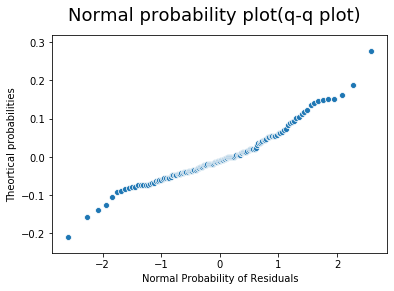

In [72]:
import scipy

sns.scatterplot(scipy.stats.probplot(residual)[0][0],scipy.stats.probplot(residual)[0][1])
plt.suptitle('Normal probability plot(q-q plot)' ,fontsize = 18)
plt.xlabel('Normal Probability of Residuals')
plt.ylabel('Theortical probabilities')

### The distribution of residual seems to be following a fairly normal distribution. Lets check by plotting a histogram if it has mean approximated to 'zero'

Text(0.5, 0.98, 'Verifying the mean assumption of error terms (MODEL 11)')

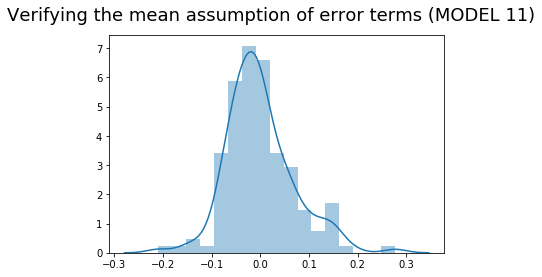

In [73]:
sns.distplot(residual)
plt.suptitle('Verifying the mean assumption of error terms (MODEL 11)' ,fontsize = 18)


### Residual lag plot to check the independence of residuals

Text(0, 0.5, 'residual')

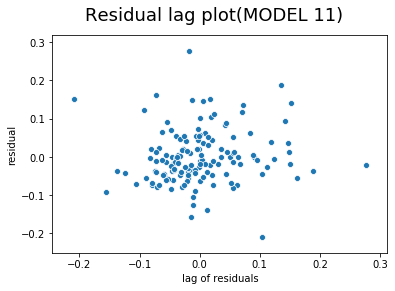

In [74]:
lag_res = residual.shift(periods = 1).fillna(0)
sns.scatterplot(lag_res,residual)
plt.suptitle('Residual lag plot(MODEL 11)' ,fontsize = 18)
plt.xlabel('lag of residuals')
plt.ylabel('residual')

### The residuals seem to be independent . Lets finally check if the data is homoscedasticity

Text(0, 0.5, 'Residual')

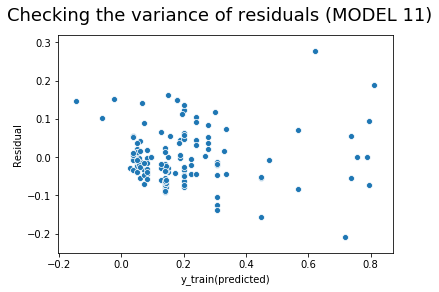

In [75]:
sns.scatterplot(y_train_pred,residual)
plt.suptitle('Checking the variance of residuals (MODEL 11)' ,fontsize = 18)
plt.xlabel('y_train(predicted)')
plt.ylabel('Residual')

# ` We can see as predicted value of y increases the variance of residuals also seem to increase, which suggests it violates the assumptions of guass-markov theorem. So, OLS estimators may not be BLUE . We need to check for other unbaised estimators which will be helpful when data is 'heteroscedastic' . But, lets make predictions on the test and evaluate it before looking for other methods`

### Making predictions on test set

In [76]:
# transforming the test data according to the parameters we used for scaler earlier
test_car[test_car.columns] = scaler.transform(test_car)

In [77]:
test_car.head()

,aspiration_turbo,avg_mileage,boreratio,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,carheight,carlength,carwidth,...,horsepower,peakrpm,price,stroke,symboling,wheelbase,insur_risk_bin_Safe,insur_risk_bin_Moderate,insur_risk_bin_Possible Risk,insur_risk_bin_Risky
car_ID,,,,,,,,,,,,,,,,,,,,,
132,0.0,0.328767,0.657143,0.0,1.0,0.0,0.0,0.154545,0.532836,0.538462,...,0.264151,0.387755,0.118589,0.871429,0.8,0.276968,0.0,0.0,1.0,0.0
118,1.0,0.164384,0.764286,0.0,0.0,1.0,0.0,0.654545,0.680597,0.683761,...,0.591195,0.591837,0.323519,0.542857,0.4,0.623907,0.0,1.0,0.0,0.0
64,0.0,0.657534,0.607143,0.0,0.0,1.0,0.0,0.609091,0.547761,0.529915,...,0.100629,0.204082,0.140931,0.628571,0.4,0.355685,0.0,1.0,0.0,0.0
57,0.0,0.136986,0.564286,0.0,1.0,0.0,0.0,0.072727,0.416418,0.461538,...,0.333333,0.755102,0.166998,0.564286,1.0,0.253644,0.0,0.0,0.0,1.0
50,0.0,0.000000,0.714286,0.0,0.0,1.0,0.0,-0.090909,0.755224,0.880342,...,1.345912,0.346939,0.766645,0.328571,0.4,0.448980,0.0,1.0,0.0,0.0


### dividing into x_test , y_test and predicting and making predictions using the final model

In [78]:
y_test = test_car['price']
X_test = test_car[X_top.columns]
X_test_sm = sm.add_constant(X_test)

y_test_pred = lin_model1.predict(X_test_sm)

## Lets now test the r_squared on the test set to check how strong our model is doing

In [79]:
from sklearn.metrics import r2_score

r2_score(y_train,y_train_pred)

0.8744321029371033

In [80]:
r2_score(y_test,y_test_pred) 

0.8510814420329433

## The r-squared on the test set is also very good . The model was able to justify 85% variance of price around the mean.

### Lets plot y_test and y_pred to understand the spread

Text(0, 0.5, 'y_test_pred')

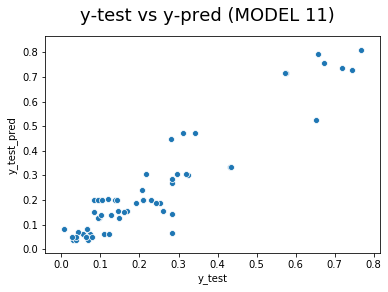

In [81]:
sns.scatterplot(y_test,y_test_pred)
plt.suptitle('y-test vs y-pred (MODEL 11)' ,fontsize = 18)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

## WE SAW THAT THAT OLS ESTIMATORS MIGHT NOT BE 'BLUE' AS THE ASSUMPTION OF CONSTANT VARIANCE WAS NOT SATISFIED. SO FIRST WE NEED TO HAVE A STATISTICAL PROOF IF THE DISTRIBUTION OF ERROR TERMS  IS 'HOMOSCEDASTIC' OR NOT

### `This is called breusch pagan test which is used to test if the error terms is 'homoscedastic' or not. 
## Here , 
#### NULL HYPOTHESIS = variance is equal throughout (The data is homoscedastic)

#### ALTERNATIVE HYPOTHESIS = variance increases/decreases as y increases ( The data is not homoscedastic)`

#### LETS FIX THE SIGNIFICANCE LEVEL AT 5%

In [82]:
from statsmodels.stats.diagnostic import het_breuschpagan
they_are = ['lagrange multiplier statistic','p-value of lagrange multiplier test',
            'f-statistic of the hypothesis','p-value for the f-statistic']
lis = [round(x,3) for x in het_breuschpagan(residual,X_train_sm)]

In [83]:

list(zip(they_are,lis))

[('lagrange multiplier statistic', 30.609),
 ('p-value of lagrange multiplier test', 0.0),
 ('f-statistic of the hypothesis', 7.462),
 ('p-value for the f-statistic', 0.0)]

## We can clearly see that p-value of f-statistic is less than significance level. Thus, we reject the null hypothesis that the distribution of error terms is homeoscedastic. 
## Thus , we need to also look at alternative approach when the data is 'heteroscedastic'

## `Let's choose to do logarthmic transformation of our dependent variable  'price' because as we can see that ,as 'price' increases residual tend to diverge apart which indicates the data is exponentially increasing(proved by the boxplot how skewed the data is)`

Text(0.5, 0.98, 'Boxplot to verify the skewness of Price')

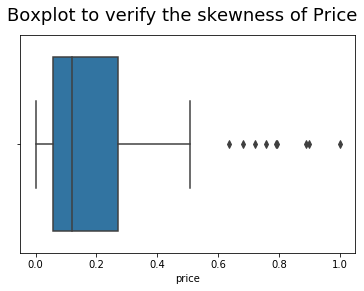

In [84]:
sns.boxplot(y_train_sm)
plt.suptitle('Boxplot to verify the skewness of Price' ,fontsize = 18)

### converting our dependent variable in 'log' scale

In [85]:
y_temp = np.log(back_car['price'])

### Normalizing the 'feature variables'

In [86]:
X_temp = back_car[back_car.columns.difference(['price'])]
scaler_1 = MinMaxScaler()
X_temp[X_temp.columns] = scaler_1.fit_transform(X_temp)



### Creating a linear regression object

In [87]:
lr_log = LinearRegression()

### As we have done logarthmic transformation of 'y' lets fit the model by using all the features and then run RFE to pick top 13 variables

In [88]:
lr_log.fit(X_temp,y_temp)

rfe_log = RFE(lr_log,13)

In [89]:
rfe_log.fit(X_temp,y_temp)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=13, step=1, verbose=0)

### Top 13 features based on RFE

In [90]:
top_13 = list(X_temp.columns[rfe_log.support_])
top_13

['carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'carwidth',
 'company_name_bmw',
 'company_name_chevrolet',
 'company_name_isuzu',
 'company_name_peugeot',
 'company_name_porsche',
 'curbweight',
 'enginelocation_rear',
 'enginetype_rotor']

## As we have already seen the process of how to remove redundant variables, how to check adjusted r-squared and how to do feature elimination let me show you the final model after performing the operations which is showed in the `markdown cell below'

### Please replace these lines one by one in the first line of next cell and execute it to see how the feature elimination was done
X_fix = X_temp[top_13] <br>
X_fix = X_fix[X_fix.columns.difference(['carwidth'])] <br>
X_fix = X_fix[X_fix.columns.difference(['company_name_chevrolet'])] <br>
X_fix = X_fix[X_fix.columns.difference(['company_name_isuzu'])] <br>
X_fix = X_fix[X_fix.columns.difference(['carbody_hardtop'])] <br>
X_fix = X_fix[X_fix.columns.difference(['carbody_sedan'])] <br>
X_fix = X_fix[X_fix.columns.difference(['enginelocation_rear'])]


In [91]:
X_fix = X_temp[top_13] 
X_fix = X_fix[X_fix.columns.difference(['carwidth'])] 
X_fix = X_fix[X_fix.columns.difference(['company_name_chevrolet'])] 
X_fix = X_fix[X_fix.columns.difference(['company_name_isuzu'])] 
X_fix = X_fix[X_fix.columns.difference(['carbody_hardtop'])]
X_fix = X_fix[X_fix.columns.difference(['carbody_sedan'])] 
X_fix = X_fix[X_fix.columns.difference(['enginelocation_rear'])]

X_train_log = sm.add_constant(X_fix)
y_train_log = y_temp
log_model= sm.OLS(y_temp,X_train_log).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     202.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.52e-68
Time:                        08:17:25   Log-Likelihood:                 69.996
No. Observations:                 143   AIC:                            -124.0
Df Residuals:                     135   BIC:                            -100.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.4479      0.035    241.208      0.000       8.379       8.517
carbody_hatchback       -0.0838      0.030     -2.813      0.006      -0.143      -0.025
carbody_wagon           -0.1804      0.042     -4.258      0.000      -0.264      -0.097
company_name_bmw         0.3982      0.062      6.394      0.000       0.275       0.521
company_name_peugeot    -0.2729      0.063     -4.326      0.000      -0.398      -0.148
company_name_porsche     0.7526      0.090      8.374      0.000       0.575       0.930
curbweight               2.2589      0.075     30.134      0.000       2.111       2.407
enginetype_rotor         0.3710      0.154      2.404      0.018       0.066       0.676
==============================================================================
Omnibus:                        9.313   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               14.537
Skew:                          -0.307   Prob(JB):                     0.000697
Kurtosis:                       4.436   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let's also verify with the VIF's of final model

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_fix.columns
vif['VIF'] = [variance_inflation_factor(X_fix.values,index) for index in range(X_fix.shape[1])]
vif.sort_values('VIF',ascending = False)

,Features,VIF
5,curbweight,1.855632
0,carbody_hatchback,1.320323
1,carbody_wagon,1.194083
3,company_name_peugeot,1.174806
2,company_name_bmw,1.163555
4,company_name_porsche,1.039553
6,enginetype_rotor,1.022033


##  Overall ,our adjusted r-squared is very good , prob(f-statistic) is good , VIF's are very less, there are no insignificant variables in the model
## Our r-squared and adjusted r-squared is 5% greater than the previous model which we build before doing log transformation. But ,there is also a chance of overfitting. Let's do residual analysis before evaluating the model on test set



In [93]:
y_log_tr = log_model.predict(X_train_log)    #predicting the value of 'y'
res_log = y_temp - y_log_tr                 # finding residuals



### Checking the normality and mean = 0 assumptions

Text(0.5, 0, 'Distribution of Residuals')

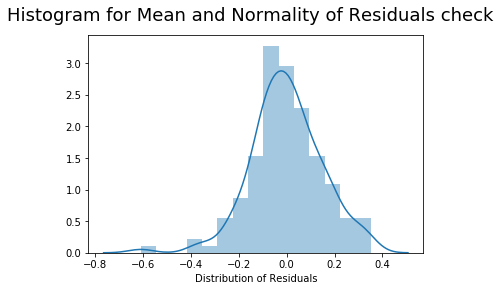

In [94]:
sns.distplot(res_log)
plt.suptitle('Histogram for Mean and Normality of Residuals check' ,fontsize = 18)
plt.xlabel('Distribution of Residuals')


### Residual lag plot to check independence of residuals

Text(0, 0.5, 'residual')

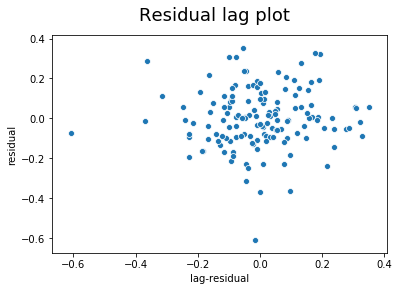

In [95]:
lag_res_1 = res_log.shift(periods = 1).fillna(0)
sns.scatterplot(lag_res_1,res_log)
plt.suptitle('Residual lag plot' ,fontsize = 18)
plt.xlabel('lag-residual')
plt.ylabel('residual')

## `The residual terms are fairly independent. Now, finally and most importantly lets check if the data is homoscedastic`

Text(0, 0.5, 'residual')

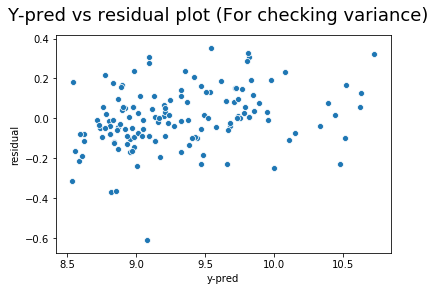

In [96]:
sns.scatterplot(y_temp,res_log)
plt.suptitle('Y-pred vs residual plot (For checking variance)' ,fontsize = 18)
plt.xlabel('y-pred')
plt.ylabel('residual')

## There is no pattern observed in the variance of residuals . Let's confirm that the data is 'homeoscedastic' using the breusch pagan test again

In [97]:
from statsmodels.stats.diagnostic import het_breuschpagan
they_are = ['lagrange multiplier statistic','p-value of lagrange multiplier test',
            'f-statistic of the hypothesis','p-value for the f-statistic']
lis = [round(x,3) for x in het_breuschpagan(res_log,X_train_log)]

In [98]:
list(zip(they_are,lis))

[('lagrange multiplier statistic', 8.425),
 ('p-value of lagrange multiplier test', 0.297),
 ('f-statistic of the hypothesis', 1.207),
 ('p-value for the f-statistic', 0.303)]

### p-value is pretty high. Thus we have statistically verified that the data is 'homeoscedastic'

## Let's now make predictions on the test set

In [99]:
ano = copy.deepcopy(back_car_test)  #copying test data

curbweight	1.855632
0	carbody_hatchback	1.320323
1	carbody_wagon	1.194083
3	company_name_peugeot	1.174806
2	company_name_bmw	1.163555
4	company_name_porsche	1.039553
6	enginetype_rotor	1.022033

### We need to convert our dependent variable of test data in 'log' scale and then transform of our features to fitted scaler values

In [100]:
y_test_log = np.log(ano.pop('price'))
ano[ano.columns] = scaler_1.transform(ano)
X_test_log = ano[X_fix.columns]


### Let's predict the 'price' of test

In [101]:
X_test_log = sm.add_constant(X_test_log)  #adding constant
y_log_pred_test = log_model.predict(X_test_log)



### R-squared of the train set

In [102]:
r2_score(y_temp,y_log_tr)

0.9129963061161909

### R-squared of the test set

In [103]:
r2_score(y_test_log,y_log_pred_test)

0.8971590980214729

### Comparing r-squared of model 11 VS r-squared of FINAL MODEL (logarithmic transformation)

In [104]:
print('r-squared of the test set of MODEL 11 is {}'.format(r2_score(y_test,y_test_pred)))
print('r-squared of the test set of FINAL MODEL is {}'.format(r2_score(y_test_log,y_log_pred_test)))

r-squared of the test set of MODEL 11 is 0.8510814420329433
r-squared of the test set of FINAL MODEL is 0.8971590980214729


### So, we can see we have achieved a greater r-score and made the model more efficent in understanding the underlying variance in 'price' after making log transformation.

Text(0, 0.5, 'y-pred')

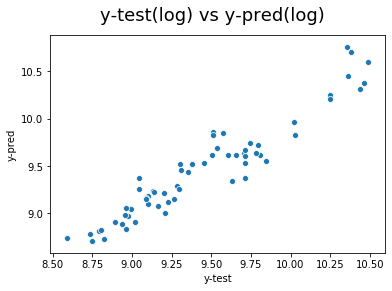

In [105]:
sns.scatterplot(y_test_log,y_log_pred_test)
plt.suptitle('y-test(log) vs y-pred(log)' ,fontsize = 18)
plt.xlabel('y-test')
plt.ylabel('y-pred')

## Questions to answer

### Which variables are significant in predicting the price of a car?


### Lets see parameters of both the models we have created

In [106]:
lin_model1.params.to_frame()

,0
const,-0.145270
carwidth,0.652460
company_name_bmw,0.343275
company_name_buick,0.304528
company_name_jaguar,0.382121
enginelocation_rear,0.619479


In [107]:
log_model.params.to_frame()

,0
const,8.447935
carbody_hatchback,-0.083758
carbody_wagon,-0.180428
company_name_bmw,0.398232
company_name_peugeot,-0.272949
company_name_porsche,0.752630
curbweight,2.258892
enginetype_rotor,0.370984


## `Which Car Companies are strongest influencers of price of a car in the USA market`:
### a) BMW
### b) BUICK
### c) PORSCHE
### d) JAGUAR

## `Of both the models we have created, from business perspective it is important for a business to know what it can control and frame their car model and business strategy. The Chinese Car company should focus on these KPI of price:`
### a) Engine location as 'rear'
### b) Carwidth must be bigger and better
### c) Curbweight should be high
### d) Recommended engine type is 'rotor'